Text(0, 0.5, 'Values')

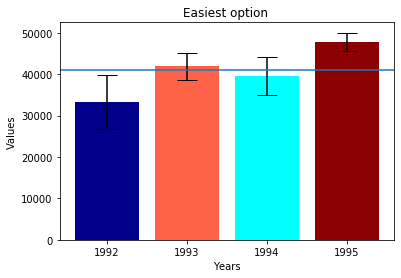

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as cm

np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])
y   = 41000
df  = df.transpose()
df  = df.describe()
df1 = df.transpose()
labels = [1992,1993,1994,1995]
x = np.arange(len(labels))
df1['limsup'] = df1['mean'] + (1.96*df.loc['std'])/np.sqrt(3650)
df1['liminf'] = df1['mean'] - (1.96*df.loc['std'])/np.sqrt(3650)
df1['yerr']   = df1['mean'] - df1['liminf']

conditions = [
    (df1['liminf'] > y),
    (df1['mean'] > y) & (df1['liminf'] < y),
    (df1['limsup'] < y), 
    (df1['mean'] < y) & (df1['limsup'] > y),
    (df1['mean'] == y)
]

choices = ['darkred', 'tomato', 'darkblue','cyan','white']
df1['color'] = np.select(conditions, choices)
fig, ax = plt.subplots()
plt.bar(x,df1['mean'],yerr=df1['yerr'],color =df1['color'],capsize =10)
ax.axhline(y=y)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_title('Easiest option ')
plt.xlabel('Years')
plt.ylabel('Values')